In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import tensorflow_model_optimization as tfmot

In [2]:
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
x_labels=test_labels

In [3]:
train_images=train_images.reshape((60000,28,28,1))

In [4]:
train_images=train_images.astype('float32')

In [5]:
train_images/=255

In [6]:
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype('float32')/255

In [7]:
from tensorflow.keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [8]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [10]:
model.fit(train_images, 
          train_labels, 
          epochs=5,
          batch_size=64)

Epoch 1/5
938/938 [==============================] - 11s 4ms/step - loss: 0.1798 - accuracy: 0.9434
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0497 - accuracy: 0.9845
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0263 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0204 - accuracy: 0.9938


In [11]:
model.save('mnist')

!python -m tf2onnx.convert --saved-model mnist --output model_mnist.onnx

INFO:tensorflow:Assets written to: mnist\assets


INFO:tensorflow:Assets written to: mnist\assets
C:\Users\adamz\miniconda3\python.exe: Error while finding module specification for 'tf2onnx.convert' (ModuleNotFoundError: No module named 'tf2onnx')


In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9922


[0.023345226421952248, 0.9922000169754028]

In [11]:
import onnx

onnx_model = onnx.load("model_mnist.onnx")
onnx.checker.check_model(onnx_model)

In [20]:
import onnxruntime as ort
import numpy as np

ort_session = ort.InferenceSession("model_mnist.onnx")


In [41]:
import time

tt1=[]
for i in test_images:
    s=time.time()
    model.predict(np.array([i]))
    e=time.time()
    tt1+=[e-s]

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


In [42]:
tt2=[]
for i in test_images:
    ort_inputs = {ort_session.get_inputs()[0].name: np.array([i])}
    s=time.time()
    ort_session.run(None, ort_inputs)
    e=time.time()
    tt2+=[e-s]


<BarContainer object of 10000 artists>

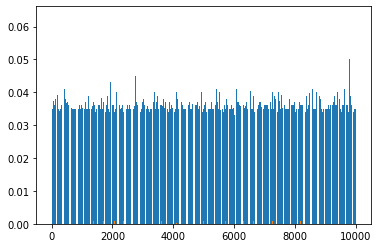

In [43]:
plt.bar(range(1,len(tt1)+1),tt1)
plt.bar(range(1,len(tt1)+1),tt2)

In [16]:
x=test_images[0]
x=np.array([x])
ort_inputs = {ort_session.get_inputs()[0].name: np.array(x)}

In [24]:
import time

s=time.time()
model.predict(x)
e=time.time()
t1=e-s

s=time.time()
pred2 = ort_session.run(None, ort_inputs)
e=time.time()
t2=e-s

print("Czas predykcji modelu: ", t1)
print("Czas predykcji onnx: ", t2)
print("Stosunek czasu predykcji modelu względem onnx: ", t1/t2)

1/1 [==============================] - 0s 13ms/step
Czas predykcji modelu:  0.03898811340332031
Czas predykcji onnx:  0.0006780624389648438
Stosunek czasu predykcji modelu względem onnx:  57.49929676511955


In [25]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\adamz\AppData\Local\Temp\tmpx5fcobpk\assets


INFO:tensorflow:Assets written to: C:\Users\adamz\AppData\Local\Temp\tmpx5fcobpk\assets


In [26]:
import pathlib

tflite_models_dir = pathlib.Path("/tmp/mnist_tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [27]:
tflite_model_file = tflite_models_dir/"mnist_model.tflite"
before=tflite_model_file.write_bytes(tflite_model)

In [28]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
tflite_model_quant_file = tflite_models_dir/"mnist_model_quant.tflite"
after=tflite_model_quant_file.write_bytes(tflite_quant_model)

INFO:tensorflow:Assets written to: C:\Users\adamz\AppData\Local\Temp\tmp6qza2qd6\assets


INFO:tensorflow:Assets written to: C:\Users\adamz\AppData\Local\Temp\tmp6qza2qd6\assets


In [29]:
before/after

3.6871871088861075

In [30]:
!ls -lh {tflite_models_dir}

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_file))
interpreter.allocate_tensors()

In [32]:
interpreter_quant = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter_quant.allocate_tensors()

In [33]:
tt=[]
for i in range(len(test_images)):
    test_image = np.expand_dims(test_images[i], axis=0).astype(np.float32)

    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]

    interpreter.set_tensor(input_index, test_image)
    interpreter.invoke()
    s=time.time()
    predictions = interpreter.get_tensor(output_index)
    e=time.time()
    tt+=[e-s]
    tak=0
    nie=0
    if np.argmax(predictions)==x_labels[i]:
        tak+=1
    else:
        nie+=1
print(tak/(tak+nie))

1.0


In [34]:
sum(tt)

0.026924848556518555

In [35]:
import tempfile
import os

import tensorflow as tf

from tensorflow import keras

# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model architecture.
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
  train_images,
  train_labels,
  epochs=1,
  validation_split=0.1,
)

1688/1688 [==============================] - 5s 3ms/step - loss: 0.2837 - accuracy: 0.9205 - val_loss: 0.1010 - val_accuracy: 0.9743


In [36]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28)           3         
 er)                                                             
                                                                 
 quant_reshape (QuantizeWrap  (None, 28, 28, 1)        1         
 perV2)                                                          
                                                                 
 quant_conv2d_3 (QuantizeWra  (None, 26, 26, 12)       147       
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_2 (Quan  (None, 13, 13, 12)       1         
 tizeWrapperV2)                                                  
                                                                 
 quant_flatten_1 (QuantizeWr  (None, 2028)            

In [39]:
train_images_subset = train_images[0:1000] # out of 60000
train_labels_subset = x_labels[0:1000]

q_aware_model.fit(train_images_subset, train_labels_subset,
                  batch_size=500, epochs=2, validation_split=0.1)

Epoch 1/2
2/2 [==============================] - 0s 106ms/step - loss: 7.3412 - accuracy: 0.0989 - val_loss: 7.0525 - val_accuracy: 0.0700
Epoch 2/2
2/2 [==============================] - 0s 89ms/step - loss: 6.9472 - accuracy: 0.0967 - val_loss: 6.6486 - val_accuracy: 0.0700


In [40]:
_, baseline_model_accuracy = model.evaluate(
    test_images, test_labels, verbose=0)

_, q_aware_model_accuracy = q_aware_model.evaluate(
   test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)
print('Quant test accuracy:', q_aware_model_accuracy)

Baseline test accuracy: 0.9678000211715698
Quant test accuracy: 0.965399980545044


In [63]:
!pip install git+https://github.com/huggingface/evaluate --upgrade 

  Cloning https://github.com/huggingface/evaluate to c:\users\adamz\appdata\local\temp\pip-req-build-vacsam4b
  Resolved https://github.com/huggingface/evaluate to commit 2c6d460add5a3ad4a87fd4d1285c6ac8d92c320f


  Running command git clone -q https://github.com/huggingface/evaluate 'C:\Users\adamz\AppData\Local\Temp\pip-req-build-vacsam4b'


In [65]:
from optimum.onnxruntime import ORTModelForImageClassification
from transformers import AutoFeatureExtractor
from pathlib import Path


model_id="mnist"
onnx_path = Path("onnx")

# load vanilla transformers and convert to onnx
model = ORTModelForImageClassification.from_pretrained(model_id, from_transformers=True)
preprocessor = AutoFeatureExtractor.from_pretrained(model_id)

# save onnx checkpoint and tokenizer
#model.save_pretrained(onnx_path)
#preprocessor.save_pretrained(onnx_path)

OSError: Can't load config for 'mnist'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'mnist' is the correct path to a directory containing a config.json file

In [66]:
from transformers import pipeline

vanilla_clf = pipeline("image-classification", model=model, feature_extractor=preprocessor)

NameError: name 'preprocessor' is not defined

In [67]:
from optimum.onnxruntime import ORTQuantizer
from optimum.onnxruntime.configuration import AutoQuantizationConfig

# create ORTQuantizer and define quantization configuration
dynamic_quantizer = ORTQuantizer.from_pretrained(model_id, feature=model.pipeline_task)
dqconfig = AutoQuantizationConfig.avx512_vnni(is_static=False, per_channel=False)

# apply the quantization configuration to the model
model_quantized_path = dynamic_quantizer.export(
    onnx_model_path=onnx_path / "model.onnx",
    onnx_quantized_model_output_path=onnx_path / "model-quantized.onnx",
    quantization_config=dqconfig,
)

AttributeError: 'Sequential' object has no attribute 'pipeline_task'

In [68]:
import os

# get model file size
size = os.path.getsize(onnx_path / "model-optimized.onnx")/(1024*1024)
quantized_model = os.path.getsize(onnx_path / "model-quantized.onnx")/(1024*1024)

print(f"Model file size: {size:.2f} MB")
print(f"Quantized Model file size: {quantized_model:.2f} MB")

FileNotFoundError: [WinError 3] System nie może odnaleźć określonej ścieżki: 'onnx\\model-optimized.onnx'

In [69]:
from optimum.onnxruntime import ORTModelForImageClassification
from transformers import pipeline, AutoFeatureExtractor

model = ORTModelForImageClassification.from_pretrained(onnx_path, file_name="model-quantized.onnx")
preprocessor = AutoFeatureExtractor.from_pretrained(onnx_path)

q8_clf = pipeline("image-classification", model=model, feature_extractor=preprocessor)

AttributeError: 'WindowsPath' object has no attribute 'split'

In [70]:
from time import perf_counter
import numpy as np
from PIL import Image
import requests

payload="https://datasets-server.huggingface.co/assets/beans/--/default/validation/30/image/image.jpg"

def measure_latency(pipe):
    # prepare date
    image = Image.open(requests.get(payload, stream=True).raw)
    inputs = pipe.feature_extractor(images=image, return_tensors="pt")
    latencies = []
    # warm up
    for _ in range(10):
        _ = pipe.model(**inputs)
    # Timed run
    for _ in range(200):
        start_time = perf_counter()
        _ =  pipe.model(**inputs)
        latency = perf_counter() - start_time
        latencies.append(latency)
    # Compute run statistics
    time_avg_ms = 1000 * np.mean(latencies)
    time_std_ms = 1000 * np.std(latencies)
    time_p95_ms = 1000 * np.percentile(latencies,95)
    return f"P95 latency (ms) - {time_p95_ms}; Average latency (ms) - {time_avg_ms:.2f} +\- {time_std_ms:.2f};", time_p95_ms


vanilla_model=measure_latency(vanilla_clf)
quantized_model=measure_latency(q8_clf)

print(f"Vanilla model: {vanilla_model[0]}")
print(f"Quantized model: {quantized_model[0]}")
print(f"Improvement through quantization: {round(vanilla_model[1]/quantized_model[1],2)}x")

NameError: name 'vanilla_clf' is not defined